<a href="https://colab.research.google.com/github/churry75/tf_tutorial/blob/master/tf_tutorial_02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 불러오기

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_full_images, train_full_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


1. 데이터 셋에 클래스 이름이 정의되어 있지 않기 때문에 0 ~ 9의 레이블에 맞춰서 클래스 이름 선언

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2. 데이터 확인

In [ ]:
train_full_images.shape

(60000, 28, 28)

In [ ]:
train_full_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

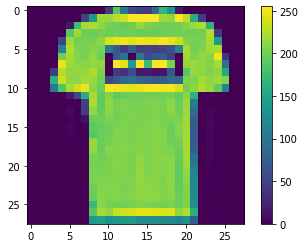

In [ ]:
plt.figure()
plt.imshow(train_full_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

3. 데이터 전처리
    - 훈련 전 데이터 전처리 단계
    - 이미지의 값을 0 ~ 1 사이로 
    - 전체 train 데이터에서 vaild 데이터 분리 및 정규화

In [ ]:
valid_images, train_images = train_full_images[:5000] / 255.0, train_full_images[5000:] / 255.0
valid_labels, train_labels = train_full_labels[:5000], train_full_labels[5000:]
test_images = test_images / 255.0

In [ ]:
valid_images.shape

(5000, 28, 28)

In [ ]:
train_images.shape

(55000, 28, 28)

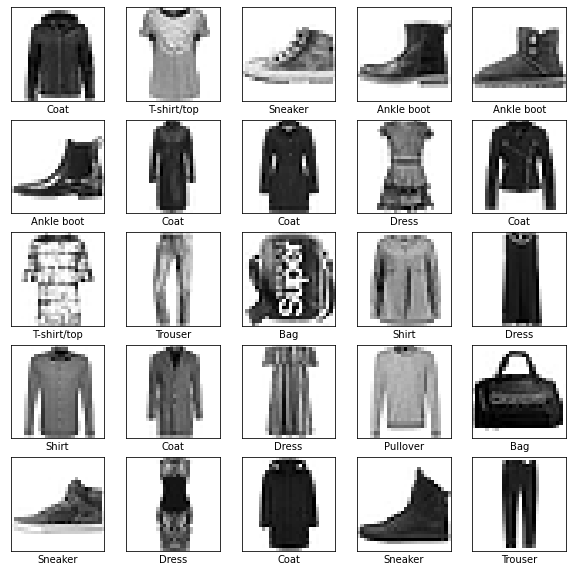

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 설정
## Sequential API 사용
- 가장 간단한 케라스의 신경망 모델

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

- Flatten: 2차원 배열의 이미지를 28 * 28 = 784 픽셀의 1차원 이미지로 변환
    - (input).reshape(-1, 28*28)을 계산
    - 전처리 수행 작업
    - batch_size를 제외한 샘플의 이미지만을 입력
- Dense(완전 연결층) 은닉층 구성
    - 활성화 함수: _Relu_
    - 뉴런 개수
        - 은닉층_1: 300개
        - 은닉층_2: 100개
- Dense 출력층 구성
    - 뉴런 개수: 10개
    - 활성화 함수: _Softmax_
        - why? 클래스들이 배타적 이므로...

> `activation='relu'` == `activation = keras.activation.relu`
활성화 함수에 대한 전체 리스트는 [Link](http://keras.io/activations) 참고

## 모델 층 구성 정보 확인

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
type(model.layers)

list

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

### 층의 파라미터 확인 방법
- `get_weight()` 사용

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03770764, -0.05693615, -0.04917307, ..., -0.05639156,
         0.0594293 ,  0.03320393],
       [ 0.03421903, -0.01009894,  0.03445695, ..., -0.05623742,
        -0.02886158,  0.05174698],
       [ 0.02896158,  0.04800321, -0.0506296 , ..., -0.06521712,
        -0.02440413,  0.03367826],
       ...,
       [ 0.04398489, -0.06262626,  0.00150014, ...,  0.02040758,
        -0.07016663, -0.01243699],
       [-0.06560042,  0.03983253,  0.07334235, ..., -0.05007394,
        -0.01552234,  0.04555964],
       [ 0.02411408, -0.0115964 , -0.04629562, ...,  0.01302569,
        -0.03757626,  0.06807001]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

- 가중치 행렬의 크기(784, )는 입력에 크기(28*28)에 달려있음
- Dense 층은
    - 연결 가중치(weights or kernel)를 무작위로 초기화
    - 편향(bias)는 0으로 초기화
    - 다른 초기화 방법을 사용하고 싶으면
        - `kernel_initializer`와 `bias_initializer` 매개변수 설정할 수 있음
        - 매개변수 리스트는 [link](https://keras.io/initializers)를 참고

## 모델 컴파일
- 손실 함수: 훈련하는 동안 모델의 오차를 측정
- Optimaizer: 데이터와 손실 함수를 바탕으로 모델의 업데이트 방향 결정
- 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링 하기 위해 사용

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy]
              )

- `optimizer=keras.optimizers.SGD()` == `optimizer='sgd'`
    - SGD, Stochastic Gradient Descent, 확률적 경사 하강법
    - 역전파 알고리즘을 수행하여, 하이퍼파라미터 학습
    - SGD는 default 값으로 learning_rate=0.01을 사용
- `loss=keras.losses.sparse_categorical_crossentropy` == `loss='sparse_categorical_crossentropy`
    - 레이블이 정수 하나로 이루어져 있고, 클래스가 배타적이므로 손실함수로 `sparse_categorical_crossentropy`를 사용함
    - 만양 샘플마다 클래별로 타깃 확률을 가지고 있다면(e.g. one-hot 벡터), `categorical_crossentropy` 손실함수를 사용해야함
- `metrics=[keras.metrics.sparse_categorical_accuracy` == `metrics=['accuracy']`


## 모델 훈련
- 훈련 데이터를 모델에 로드, train_images, train_labels
- 훈련이 진행되는 동안 모델이 이미지와 레이블을 맵핑
- vaildation data를 이용하여 훈련 평가 병행하여 진행

In [ ]:
histo = model.fit(train_images, train_labels, epochs=30,
          validation_data=(valid_images, valid_labels))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9918 - sparse_categorical_accuracy: 0.6847 - val_loss: 0.5131 - val_sparse_categorical_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5088 - sparse_categorical_accuracy: 0.8212 - val_loss: 0.4509 - val_sparse_categorical_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4480 - sparse_categorical_accuracy: 0.8419 - val_loss: 0.4215 - val_sparse_categorical_accuracy: 0.8584
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4210 - sparse_categorical_accuracy: 0.8522 - val_loss: 0.4054 - val_sparse_categorical_accuracy: 0.8598
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3996 - sparse_categorical_accuracy: 0.8599 - val_loss: 0.3795 - val_sparse_categorical_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3847 - spars

- 시각화 도구를 이용하여 손실함수와 정확도 확인

In [ ]:
import pandas as pd

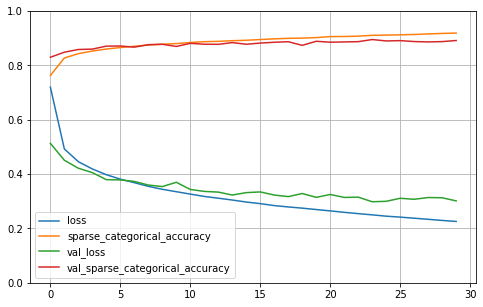

In [ ]:
pd.DataFrame(histo.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### 학습 결과가 만족스럽지 못하다면?
1. 학습률 튜닝
2. 옵티마이저 변경
3. 층 개수, 뉴런 개수 활성화 함수 등의 모델의 하이퍼파라미터 튜닝

## 모델 평가
- 모델을 상용 환경으로 배포하기 전에 테스트 세트로 모델을 평가하여 일반화 오차 추정
- `evaluate()` 메서드 사용

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3371 - sparse_categorical_accuracy: 0.8822


[0.3371058702468872, 0.8822000026702881]

## 예측 만들기
- `predict()` 메서드를 사용하여, 새로운 샘플에 대해 예측을 만들 수 있다.
> 다른 새로운 샘플이 없으므로, 여기서는 테스트 이미지로 사용

In [ ]:
new_image = test_images[:3]
model.predict(new_image).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
new_labels = model.predict_classes(new_image)
new_labels

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [ ]:
new_pred = np.argmax(model.predict(new_image), axis=-1)
new_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[new_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')